# <span style="color:#0b486b">  FIT3181: Deep Learning (T1, 2019)</span>
***
*CE & Lecturer:* Prof **Dinh Phung** | dinh.phung@monash.edu <br/>
*Head Tutor:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Tutor:* Mr **Quan Hoang** | quan.hoang@monash.edu
<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

## <span style="color:#0b486b">Assignment 02: Neural Embedding and Sequence Modelling</span>
### Due: <span style="color:red">5:00pm 24 May 2019</span>  (Friday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to you final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for your to complete Assignment 2. The theme of this assignment is about  using neural word embedding as automatic feature extraction process and sequence modelling with CNNs and RNNs. Some sections have been partially completed to help you get
started. **The total marks for this notebook is 100**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br><br>
* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

This assignment contains **two** parts:

* Part 1: Questions on theory and knowledge on machine learning and deep learning **[35 points]**
* Part 2: Coding assessment on CNN, sequence modeling and neural embedding **[65 points]**

**Hint**: This assignment was essentially designed based on the lectures and tutorials sessions covered from Week 4 to 10. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment02_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. 

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment02_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment02_solution.ipynp**:  this is your Python notebook solution source file.
1.	**Assignment02_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

---

## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 35 points]<span></div>

The first part of this assignment is for you to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. 

####  <span style="color:red">Question 1.1</span>  DNN for binary classification with adjusted output range

Once again, consider the use of DNN for classification task with the specific architecture below that we have encountered in the class as well as in assignment 1. This question will investigate deeper into this network to provide it with further flexiblity.

<img src='./images/dnn_arch.png' width=300>

Since the last layer has two hidden units followed by a softmax function, this DNN is a **binary** classifier. Binary classifier is a special type of classifier where we can further simplify to provide flexiblity and theoretical analysis. For notation simplicity, at the last layer, let $h^L(x) = [h_0, h_1]$:

<span style="color:red">**(a)**</span> Show that the output vector can be written as $y = [y_0, y_1]$ where $y_0 = \frac{e^{h_0}}{{e^{h_0} + e^{h_1}}}$ and $y_1 = \frac{e^{h_1}}{{e^{h_0} + e^{h_1}}}$ and verify that $0 \leq y_0, y_1 \leq 1$ and $y_0 + y_1$ = 1

<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

### Part 1: Show that the output vector can be written as $y = [y_0, y_1]$ where $y_0 = \frac{e^{h_0}}{{e^{h_0} + e^{h_1}}}$ and $y_1 = \frac{e^{h_1}}{{e^{h_0} + e^{h_1}}}$.

The last layer:

> <div style="background-color:#F5F5F5;padding:15px;">$$h^L(x) = [h_0, h_1] \tag{1}$$</div>

The softmax function:

> <div style="background-color:#F5F5F5;padding:15px;">$$softmax(z)=\big[\frac{\exp(z_i)}{\sum_{j=0}^{C-1}{\exp(z_j)}}\big]_{i=0}^{C-1} \tag{2}$$ </div>

where 
- z is the input that contains the value of last layer
- i is the current value
- j is the starting index summation starts performing
- C is the number of classes

Since there are only 2 output neurons for the last layer, the softmax function can be written as:

> <div style="background-color:#F5F5F5;padding:15px;">$$softmax(z)=\frac{\exp(z_i)}{\sum_{j=0}^{1}{\exp(z_j)}} \tag{3}$$</div>

where $i$ is either 0 or 1 indicating the first or second class

Applying the softmax function $(3)$ to the last layer $(1)$:

> <div style="background-color:#F5F5F5;padding:15px;">
\begin{align*}
y
&= [\frac{e^{h_0}}{e^{h_0} + e^{h_1}}, \frac{e^{h_1}}{e^{h_0} + e^{h_1}}] \\
&= [y_0, y_1] \;\;\;(QED)
\end{align*}

Therefore, it is proven that $y = [y_0, y_1]$ where $y_0 = \frac{e^{h_0}}{{e^{h_0} + e^{h_1}}}$ and $y_1 = \frac{e^{h_1}}{{e^{h_0} + e^{h_1}}}$. 
</div>

***
### Part 2: Verify that $0 \leq y_0, y_1 \leq 1$ and $y_0 + y_1$ = 1.

<span style="color:green;font-weight:bold;">Part 2.1: $0 \leq y_0, y_1 \leq 1$.</span>

Fact & Assumption:
> <div style="background-color:#EEF2CF;padding:15px;">
$y_0$ and $y_1$ can never be equal to 0 as the numerator is in the form of $e^x$ and the range of $e^x$ is $(0, \infty)$. Thus, we assume that the equality in "$0 \leq y_0, y_1$" only happens when they are approaching to a very small number and eventually become 0 due to some reasons such as rounding up to a certain number of decimal places.
</div>

For the ease of working, $y_0$ and $y_1$ can be rewritten as:

> <div style="background-color:#F5F5F5;padding:15px;">
\begin{align*}
$y_0 
&= \frac{e^{h_0}}{{e^{h_0} + e^{h_1}}}$ \\
&= \frac{1}{{1 + \frac{e^{h_1}}{e^{h_0}}}}$
\end{align*}
</div>

> <div style="background-color:#F5F5F5;padding:15px;">
\begin{align*}
$y_1 
&= \frac{e^{h_1}}{{e^{h_0} + e^{h_1}}}$ \\
&= \frac{1}{{1 + \frac{e^{h_0}}{e^{h_1}}}}$
\end{align*}
</div>

Proof by cases:
- Case 1: the values of $h_0$ and $h_1$ are both large or both small.
  
  Given that $h_0$ and $h_1$ are roughly the same (either both large or small), we know that:
  > <div style="background-color:#F5F5F5;padding:15px;">
    $$\frac{e^{h_1}}{e^{h_0}} \approx \frac{e^{h_0}}{e^{h_1}} \approx 1$$
    </div>
    
  Hence, they yields
  > <div style="background-color:#F5F5F5;padding:15px;">
    $$\frac{1}{{1 + 1}} = \frac{1}{2} = 0.5$$
    </div>
- Case 2: One of the $h_0$ and $h_1$ is overwhemingly larger than the other one.

 - Case 2a: $e^{h_0}$ over $e^{h_1}$ and $h_0$ > $h_1$:
   
   When a very large number is divided by a very small number, it will still be very large. Hence, in our case, we would have a very large denominator and eventually we get a value of nearly 0.
   
   let $e^{h_0} = 100,000$, and $e^{h_1} = 10$
 > <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    \frac{1}{{1 + \frac{e^{h_0}}{e^{h_1}}}}
    &= \frac{1}{1 + \frac{100000}{10}} \\
    &= \frac{1}{1 + 10000} \\
    &\approx 0
    \end{align*}
    </div>
    
 - Case 2b: $h_0$ < $h_1$:
 
   This would be just the inverse of Case 2a, so we let $e^{h_0} = 10$, and $e^{h_1} = 100,000$
   > <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    \frac{1}{{1 + \frac{e^{h_0}}{e^{h_1}}}}
    &= \frac{1}{1 + \frac{10}{100000}} \\
    &= \frac{1}{1 + 0.0001} \\
    &\approx 1
    \end{align*}
    </div>
    
    Here, only $y_1$ is used as the example but the case 2a and 2b have included the results in the opposite way for $y_0$. Based on all possible cases shown above, it is convinced that $y_0$ and $y_1$ fall between 0 and 1.
    
Therefore, it is proven that $0 \leq y_0, y_1 \leq 1$.

<span style="color:green;font-weight:bold;">Part 2.2: $y_0 + y_1$ = 1.</span>

This could be simply done by using the information provided in the question statement:

> <div style="background-color:#F5F5F5;padding:15px;">
\begin{align*}
y_0 + y_1
&= \frac{e^{h_0}}{e^{h_0} + e^{h_1}} + \frac{e^{h_1}}{e^{h_0} + e^{h_1}} \\
&= \frac{e^{h_0} + e^{h_1}}{{e^{h_0} + e^{h_1}}} \\
&= 1 \;\;\;(QED)
\end{align*}
</div>

Therefore, it is proven that $y_0 + y_1$ = 1. 

<span style="color:red">**(b)**</span> Since $y_0 + y_1 = 1$, one can simply use the quantity $y_1 = \frac{e^{h_1}}{{e^{h_0} + e^{h_1}}}$ to represent the output $y$ of the whole DNN, which represents the probablity of outputing class $1$. Let $h = h_1 - h_0$, show that one can simply now write: $y = \sigma(h)$ where $\sigma(\cdot)$ is the usual sigmoid (logistic) function.

<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

Sigmoid function: 

> <div style="background-color:#F5F5F5;padding:15px;">
    $$\sigma(x) = \frac{1}{1+e^{-x}} = \frac{e^{x}}{e^{x}+1} \tag{1}$$
</div>

As mentioned in the question statement, $y$ can be represented by simply using $y_1$, so we have:

> <div style="background-color:#F5F5F5;padding:15px;">
    $y = y_1 = \frac{e^{h_1}}{{e^{h_0} + e^{h_1}}} \tag{2}$
</div>

We can rewrite equation $(2)$ as:

> <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    y 
    &= \frac{e^{h_1}}{e^{h_0} + e^{h_1}} \\ 
    &= \frac{e^{h_1} \; (\div \; e^{h_0})}{e^{h_0} + e^{h_1} \; (\div \; e^{h_0})} \\ 
    &= \frac{\frac{e^{h_1}}{e^{h_0}}}{\frac{e^{h_0}}{e^{h_0}} + \frac{e^{h_1}}{e^{h_0}}} \;\;\;\\
    &= \frac{e^{h_1 - h_0}}{{1 + e^{h_1 - h_0}}} \\ 
    &= \sigma(h_1 - h_0) \;\;\; (By \; equation \; (1))\\
    &= \sigma(h) \;\;\; (QED)
    \end{align*}
</div>

Therefore, it is proven that $y = \sigma(h)$.

<span style="color:red;">**(c)**</span> Instead of using the usual softwax computation, we can now view this network as *applying the sigmoid activation function on the last layer* on the value of $h = h_1 - h_0$ to produce a scalar output $y = \sigma(h)$ receiving a value between $0$ and $1$. 

Let $\{x_i, t_i\}$ for $i=1,\ldots,n$ be $n$ training data points where $t_i \in \{0, 1\}$ with $t_i = 0$ represents for class $C_0$ and $t_i = 1$ for class $C_1$. Let $w$ be the parameter of this network, show that the cross-entropy loss now takes the form:
$$
J(w) = -\sum_{i=1}^n \left[{t_i\ln{y_i} + (1-t_i)\ln{(1-y_i)}}\right]
$$
where $y_n = f(x_i,w), 0\leq y_n \leq 1$ is the output of the DNN applied to input $x_i$.

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

<span style="color:green;font-weight:bold;">(Note: Softmax CE Loss and Sigmoid CE Loss)</span>

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

Output (Probability of Class $1$):

> <div style="background-color:#F5F5F5;padding:15px;">
    $$y = \sigma(h)$$
</div>

Probability:

> <div style="background-color:#F5F5F5;padding:15px;">
    $$P(C=1|x) = y$$
    $$P(C=0|x) = 1 - y \tag{1}$$ 
</div>

Cross entropy loss (Given a datapoint):

> <div style="background-color:#F5F5F5;padding:15px;">
    $J(w) = -\sum_{j=0}^{C-1} t_j \ln{y_j} \tag{2}$
</div>

where 

- $x$: the input
- $C$: the number of classes
- $j$: the starting index summation starts performing
- $t$: the groundtruth
- $y$: the score or the predicted result
(Note: the index $j$ used here starts with 0 rather 1 because it indicates the groundtruth and score owned by either the class $0$ or $1$. However, the index $i$ shown in the question is describing the ith datapoint.)

Since we have only 2 classes, we can rewrite the equation $(2)$ as:

> <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    J(w) 
    &= - (t_0 \ln{y_0} + t_1 \ln{y_1})) \\
    &= -((1-t_1) \ln{(1-y_1)} + t_1 \ln{y_1})) \;\;\; (Using\;the\;fact\;in\;(1))\\
    &= -(t_1 \ln{y_1} + (1-t_1) \ln{(1-y_1)}) \\
    &= -(t \ln{y} + (1-t) \ln{(1-y)}) \;\;\; (Simplifying\;t\;and\;y\;as\;variables\;for\;Class\;1) \tag{3}
    \end{align*}
</div>

By using equation $(3)$, 

Cross entropy loss (Given all datapoints):

> <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    J(w) 
    &= J(w)_1 + J(w)_2 +\;\cdots\;+ J(w)_n \\
    &= - (t_1 \ln{y_1} + (1-t_1) \ln{1-y_1}) - (t_2 \ln{y_2} + (1-t_2) \ln{1-y_2}) -\;\cdots\;- (t_n \ln{y_n} + (1-t_n) \ln{1-y_n}) \\
    &= -\sum_{i=1}^n \left[{t_i\ln{y_i} + (1-t_i)\ln{(1-y_i)}}\right]
    \end{align*}
</div>

Therefore, the cross entropy loss is in the form of $J(w) = -\sum_{i=1}^n \left[{t_i\ln{y_i} + (1-t_i)\ln{(1-y_i)}}\right]$.

<span style="color:red">**(d)**</span> What is the corresponding loss function if we now consider training data where $t_i = -1$ represents for class $C_0$ and $t_i = 1$ for class $C_1$ and network output is scaled and shifted so that $-1 \leq y=f(x,w) \leq 1$?

<div style="text-align: right"><span style="color:red">[10 points]</span></div> 

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

The range of output $y$ is the same as the hyperbolic tangent function, so the last layer is said to be applied by $tanh$ activation function. 

> <div style="background-color:#F5F5F5;padding:15px;">
    $$y = tanh(a) \tag{1}$$
</div>

where $a$ is a form of input using values from the last layer such as $h_0$ and $h_1$. For example, $a = \frac{h_0}{2}$ or $2h_0$.

However, the logarithm used in cross entropy function expects the range of the output to be from $0$ to $1$. Hence, we cannot just present $y$ like what shown in the previous question.

Given the loss function from question ***1.1c***, which uses sigmoid activation on the last layer,

> <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    J(w) 
    &= -\sum_{i=1}^n \left[{t_i\ln{y_i} + (1-t_i)\ln{(1-y_i)}}\right] \\
    &= -\sum_{i=1}^n \left[{t_i\ln{\sigma(h)_i} + (1-t_i)\ln{(1-\sigma(h)_i)}}\right] \tag{2}
    \end{align*}
</div>

From equation $(2)$, we are given a hint of finding the relationship between sigmoid and tanh activation functions. The fact is that tanh function is just a rescaled logistic sigmoid function.

Hyperbolic tangent function:

> <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    tanh(x) 
    &= \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} \\
    &= \frac{e^{x} - e^{-x} \;(\times\;e^{-x})}{e^{x} + e^{-x} \;(\times\;e^{-x})} \\
    &= \frac{1 - e^{-2x}}{1 + e^{-2x}} \\
    &= \frac{1 + 1 - 1 - e^{2x}}{1 + e^{-2x}} \\
    &= \frac{2 - (1 + e^{2x})}{1 + e^{-2x}} \\
    &= \frac{2}{1 + e^{-2x}} - 1\\
    &= 2\big(\frac{1}{1 + e^{-2x}}\big) - 1\\
    &= 2\sigma(2x) - 1 \;\;\;\big(as\;\sigma(x)=\frac{1}{1+e^{-x}}\big)
    \end{align*}
</div>

Thus,

> <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    \sigma(2x)
    &= \frac{\tanh(x) + 1}{2} \\
    \sigma(x)
    &= \frac{\tanh(\frac{x}{2}) + 1}{2} \tag{3}
    \end{align*}
</div>

In this case, by using equation $(2)$ and $(3)$, we know that: 

> <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    P(C=1|x)
    &= \frac{\tanh(\frac{x}{2}) + 1}{2} \\
    &= \frac{1 + \tanh(\frac{x}{2})}{2} \\
    &= \frac{1 + y}{2} \\
    P(C=0|x)
    &= 1 - P(C=1|x) \\
    &= 1 - \frac{\tanh(\frac{x}{2}) + 1}{2} \\
    &= \frac{1 - y}{2}
    \end{align*}
</div>    

Recall that $Entropy$ formula:

> <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    Entropy
    &= - TrueLabel_1\ln{(PredictedProbability_1)} - TrueLabel_0\ln{(PredictedProbability_0)}
    \end{align*}
</div>

Since the true labels are not $\in \{0,1\}$, we can rescale their range like how we rescale the predicted probability:

> <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    TrueLabel_1
    &= \frac{1 + t}{2} \\
    TrueLabel_0
    &= \frac{1 - t}{2}
    \end{align*}
</div>

(You might notice that if we have true label for $C_0$ where $t = -1$, we would have 0 value for $C_1$ or vice versa.)

Eventually, the loss function can be written as:

> <div style="background-color:#F5F5F5;padding:15px;">
    \begin{align*}
    J(w) 
    &= -\sum_{i=1}^n \left[{\big(\frac{1 + t}{2}\big)\ln{\big(\frac{1 + y}{2}\big)} + \big(\frac{1 - t}{2}\big)\ln{\big(\frac{1 - y}{2}\big)}}\right] \\
    \end{align*}
</div>

<span style="color:red">**(e)**</span> Instead of applying the logistic activiation on the last layer as described above, what would be the appropriate choice for this activiation function for this new setting?

<div style="text-align: right"><span style="color:red">[4 points]</span></div> 

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

The hyperbolic tangent activation function ($tanh$) would be the appropriate choice for this activation function for this new setting as my way of inducing the loss function in ***Question 1.1d*** has proven how $tanh$ can be done for it by deriving from sigmoid activation function and rescaling only. Therefore, other than using sigmoid and softmax activation function on the last layer, $tanh$ should be one of the potential answers for this question.

#### Question 1.2 Growing Knowledge

Deep learning and machine learning knowledge grows rapidly over the past decades. New models, techniques and methods are invented on a daily basis. Being to read and understand machine learning research paper is an indespensible skill for any DL practioner and scientist. Regularly checking latest research work and learning from them should be a habit for professional growth.

In preparation for the coding assessment in Part 2, this question requires you to read a important research paper 
on the topic of ***Question Classification*** (QC) published by Roth and Xin in 2002 (which has received close to 1000 citations till today). The intension of this question is to:
- assess your machine learning knowledge through technical reading comprehension of the relevant subject matter to this unit
- assess your ability to express your understanding
- provide additional information and context for you to complete the coding assessment in Part 2. 

A pdf copy of this paper has been downloaded into this assignment folder (**`Roth_Xin_coling02.pdf`**), which is also embedded directly here in this notebook for your convenience. Run the following code to get the paper displayed here. (Note: some browser doesn't support embedding pdf directly from python notebook, in that case, please read the pdf file directly).

In [ ]:
from IPython.display import IFrame
IFrame('./Roth_Xin_coling02.pdf', width=800, height=450)

**Read this paper and answer the following questions**

<span style="color:red">**(a)**</span> Section 1 introduces the problem this paper aims to address. From this section, what is the purpose of an open-domain question-answering problem and why it is more challenging than a standard document retrieval problem?

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

The purpose of an open-domain question-answering problem is to find an accurate and concise answer to a question rather than a relevant document. The more challenging part is that it has to be more acute in tasks such as story comprehension in which the target text is less likely to overlap with the text in the questions.

<span style="color:red">**(b)**</span>  Section 2 provides the background related to the research problem. It also provides necessary definition for present work to move forwards. From this section, in your own language:
- Describe the problem of question classification (QC)
- What are the two main requirements a QC module should have when it is used for downstream question-answering task? 
- Describe the class label hierarchy proposed in this paper? How many classes at the coarse level? and how many sub-classes within each coarse class label?

<div style="text-align: right"><span style="color:red">[4 points]</span></div> 

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

- Describe the problem of question classification (QC)

> It is the task that, given a question, maps it to one of classes, which provide a semantic constraint on the sought-after answer. The intension is that this classification, potentially with other constraints on the answer, will be used by a downstream process which selects a correct answer from among several candidates.

- What are the two main requirements a QC module should have when it is used for downstream question-answering task? 

>  1. It provides constraints on the answer types that allow further processing to precisely locate and verify the answer.
    
> 2. It provides information that downstream processes may use in determining answer selection strategies that may be answer type specific, rather than uniform.

- Describe the class label hierarchy proposed in this paper? How many classes at the coarse level? and how many sub-classes within each coarse class label?

> The class label hierarchy proposed in this paper is a two-layered taxonomy, which represents a natural semantic classification for typical answers in the TREC task. The hierarchy contains 6 coarse classes (ABBREVIATION, ENTITY, DESCRIPTION, HUMAN, LOCATION and NU- MERIC VALUE) and 50 fine classes, which are shown in the figure below.

<img src='./images/question_hierarchy.png'>

(Note: Those fonts in bold are the coarse classes and the rest are the sub-classes.)

<span style="color:red">**(c)**</span>  Section 3 describes the proposed framework. In particular, sub-section 3.1 describes their proposed hierarchical classifier. From this subsection:
- What is a confusion set? 
- The authors used two classifiers, namely `CoarseClassifer` and `FineClassifier`, what is the purpose of the `CoarseClassifer`? and briefly explain how the `FineClassifier` depends on the ouputs of the `CoarseClassifer`?

<div style="text-align: right"><span style="color:red">[3 points]</span></div> 

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

- What is a confusion set?

> A confusion set is the set of all possible class labels for a given question.

- The authors used two classifiers, namely `CoarseClassifer` and `FineClassifier`, what is the purpose of the 
`CoarseClassifer`? and briefly explain how the `FineClassifier` depends on the ouputs of the `CoarseClassifer`?

> The purpose of the `CoarseClassifer` is to classify questions into coarse classes for which each coarse class can be then expanded to a fixed set of fined classes determined by the class hierarchy.

> The `FineClassifier` depends on the ouputs of the `CoarseClassifer` in that its candidate labels are generated by expanding the set of retained coarse classes from the first into a set of fine classes; this set is then treated as the confusion set for the second classifier.

<span style="color:red">**(d)**</span>  As we learned from the lectures, a powerful breakthrough that Deep Learning revoluationizes machine learning problems is its capcacity to learn representation, or features, automatically from the data, which are then used for downstream tasks such as classification, which will be subject of coding assessment in Part 2. 

However, before recent breakthrough of deep learning (around 2012), feature extraction were usually done manually. Subsection 3.2 of this paper describes such a manual feature extraction process:
- Briefly describe the high-level process of feature construction used by the authors
- What are the six feature sets the authors used in the end?
- How many features in total were used (approximately) for the sixth feature set `RelWord' ?

<div style="text-align: right"><span style="color:red">[5 points]</span></div> 

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

- Briefly describe the high-level process of feature construction used by the authors

> 1. There are 6 type of features that need to be extracted, which are 
    - words
    - pos
    - chunks
    - name entities (NE)
    - head chunks
    - semantically related words (RelWord)

> 2. More complex features are built by using a set of operators.

> 3. Use a simple script to allow features to be extracted in a data driven way.

> 4. The representation only includes those "active" features.

> 5. Use SNoW-based pos tagger to extract pos tags.

> 6. Use pre-learned classifier to extract chunks.

> 7. Use NE classifier that is learned and uses the same merchanism that is applied to chunkers to extract NE.

> 8. RelWord is constructed by checking whether a word in a question is in the list constructed for word relation and seeing if it is related to a class which is in the same sentence.

- What are the six feature sets the authors used in the end?

> 1. Feature Set 1 (Denoted by Word) contains word features.

> 2. Feautre Set 2 (Pos) contains features composed of words and pos tags.  

> 3. Feature Set 3 (Chunk) contains features composed of all in Feature Set 1 & 2 and chunks.

> 4. Feature Set 4 (Named Entity) contains features composed of all in Feature Set 1 & 2 & 3 and named entities.

> 5. Feature Set 5 (Head Chunk) contain features composed of all in Feature Set 1 & 2 & 3 & 4 and head chunks.

> 6. Feature Set 6 (RelWord) contains all the feature types mentioned in all the feature sets above and is the only one that contains the related words lists.

- How many features in total were used (approximately) for the sixth feature set `RelWord' ?

> Roughly 200,000 features were used for Feature Set 6 (RelWord).

<span style="color:red">**(e)**</span> Section 4 describes the dataset used in this research and reports on its experimental results. Reading from Table 3 of this paper, if the precision is calculated where only one label for each question is allowed, then what is the precision on the test dataset when the training size is 1000, 2000, 3000, 4000 and 5500 respectively? (Hint: you might want to cross reference sub-section 4.2 on the definition of the accuracy used in this paper).

<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

#### For Coarse Classes

| No. | Train | Test | $P_1$ |
| --- | --- | --- | --- |
| 1 | 1000 | 500 | 83.80 |
| 2 | 2000 | 500 | 84.80 |
| 3 | 3000 | 500 | 91.00 |
| 4 | 4000 | 500 | 90.80 |
| 5 | 5500 | 500 | 91.00 |

#### For Fined Classes

| No. | Train | Test | $P_1$ |
| --- | --- | --- | --- |
| 1 | 1000 | 500 | 71.00 |
| 2 | 2000 | 500 | 77.80 |
| 3 | 3000 | 500 | 79.80 |
| 4 | 4000 | 500 | 80.00 |
| 5 | 5500 | 500 | 84.20 |

---

## <span style="color:#0b486b">Part 2: Neural Embedding and Sequence Modeling</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 65 points]<span></div>

**This part of the asssignment is designed to assess your hand-on coding skill with Tensorflow to train Recurrent Neural Networks (RNN) and application of CNN for text data. The overall task is to address the same `Question Classification` problem published in Roth and Xi' 2002 paper, but instead of manually extracting features, we shall apply modern CNNs and RNNs to automatically extract features.**

The dataset we use for this part is a small [Question Classification](http://cogcomp.org/Data/QA/QC/) dataset which was used in the research paper discussed in Part 1. 

The train set consists of $1000$ questions belonging to 6 coarse question categories, including:
- abbreviation (ABBR), 
- entity (ENTY), 
- description (DESC), 
- human (HUM), 
- location (LOC) and 
- numeric (NUM).

**The task is to build CNN and RNN model to classifies these questions**

You're been provided with the module `models.py`, with some of the following classes and function for you start with:

1. `DataManager`: Support with downloading the data, tokenizing and turning questions into sequences of numbers. It also help generate next batches for training.
2. `load_data`: This function loads and spliting the dataset into the train and test sets. It returns two `DataManager` instances `train_dm` and `test_dm`, and two `dict` objects `dictionary` mapping each word to an unique word id (an non-zero integer) and `id2word` mapping the corresponding word id back to the word. Within the `train_dm`, it also splits the train data into the train and validation sets. `train_tm` will be passed to the CNN and RNN models for training.
2. `Layers`: A class providing some static method to create basic CNN layers.
3. `BaseModel`: A base class for the CNN and RNN model.

Let's start by running the following cell to load and see a few samples of the data so that you can get familiar with it.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from models import DataManager, Layers, BaseModel, load_data


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
train_dm, test_dm, dictionary, id2word = load_data(verbose=True)

Loading data...
Downloaded successfully train_1000.label
Downloaded successfully TREC_10.label
Sample questions 

[['how', 'did', 'serfdom', 'develop', 'in', 'and', 'then', 'leave', 'russia', '?'], ['what', 'films', 'featured', 'the', 'character', 'popeye', 'doyle', '?'], ['how', 'can', 'i', 'find', 'a', 'list', 'of', 'celebrities', "'", 'real', 'names', '?'], ['what', 'fowl', 'grabs', 'the', 'spotlight', 'after', 'the', 'chinese', 'year', 'of', 'the', 'monkey', '?'], ['what', 'is', 'the', 'full', 'form', 'of', '.com', '?']]
Labels ['ABBR' 'DESC' 'ENTY' 'HUM' 'LOC' 'NUM']


Sample questions 

[['how', 'far', 'is', 'it', 'from', 'denver', 'to', 'aspen', '?'], ['what', 'county', 'is', 'modesto', ',', 'california', 'in', '?'], ['who', 'was', 'galileo', '?'], ['what', 'is', 'an', 'atom', '?'], ['when', 'did', 'hawaii', 'become', 'a', 'state', '?']]
Labels ['ABBR' 'DESC' 'ENTY' 'HUM' 'LOC' 'NUM']


Sample numeral data 

[[  9  15 982 983   6  23 984 985 518   1   0   0   0   0   0   0   0  

#### <span style="color:red">**Question 2.1**</span> 
**You'll first build a simple 1D CNN model for this task by coding the `build_model` function in the cell below. The function should build a 1D CNN network with the following specifications.**

The 1D convolutional layer can be found in `Layers.conv1D`. It takes as inputs an tensor of shape `[batch size, in_width, in_channels]`, an argument `filter_width` specifying the filter size for the convolutional operation along the width axis, and an argument `output_dim` specifying the number of channels in the output. Other arguments to the function includes `stride`, `padding`, `name` and `act` as in `Layers.conv2D`. The output is a tensor of shape `[batch, out_width, output_dim]`. You are highly encouraged to read the documentation of [tf.nn.conv1d](https://www.tensorflow.org/api_docs/python/tf/nn/conv1d).

- In the CNN models that you're going to build, the input $X$ (a placeholder) is a tensor of shape `[batch size, max length]` that includes sequences of word ids for each question in the mini batch. 

- Please note that questions are padded with special word `_PAD` so that every question has the same length `max length`. The actual length of the questions before being padded is also passed to the placeholder `qlen` of shape `[batch size]`. 

- The model will learn embedding vectors for each word by creating learnable variables for word embeddings as a matrix of shape `[vocab_size, ebd_size]`, where `ebd_size` is the number of dimensions for the embedding vectors. Each row of the matrix is a embedding for a word. 

- The model then [look up](https://www.tensorflow.org/api_docs/python/tf/nn/embedding_lookup) for the embedding of each word id in the questions in the batch. 

- The result is `inputs` of shape `[batch size, max length, ebd_size]`, which will be fed to 3 separate 1D Convolutional operations using 3 different `filter_width` of 3, 5 and 7. 

- The `output_dim` for these 1D Conv layers is `state_size`. These 1D conv operations will produce word features based on different contexts. For each of the output of the 1D Conv, you'll next perform a global max pooling operation along the `width` axis. The results are 3 tensors of shape `[batch size, state_size]`. 

- Finally, you concatenate these three tensors along the `state_size` dimension to get a new tensor of shape `[batch size, 3 * state_size]`, which is fed to a dense layer to compute the logits for the softmax classifier.

- Your implementation should use `self.ebd_size` and `self.state_size` as the model's hyper-parameters, which will be tuned in the later question.
    

<div style="text-align: right"> <span style="color:red">[10 points]</span> </div>

In [4]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
class CNN(BaseModel):    
    def build_graph(self):
        self.X = tf.placeholder(shape=[None, None], dtype=tf.int32) # shape = [batch_size, max length]
        self.y = tf.placeholder(shape=[None], dtype=tf.int32)
        self.qlen = tf.placeholder(shape=[None], dtype=tf.int32) # this placeholder won't be used here, but is needed to work with the base model
        
        # Embedding layer
        self.embeddings = tf.get_variable("embeddings", [self.vocab_size, self.ebd_size])# INSERT YOUR CODE HERE
        inputs = tf.nn.embedding_lookup(self.embeddings, self.X)# INSERT YOUR CODE HERE
        
        conv1 = Layers.conv1D(inputs, 3, self.state_size, name="conv1")# INSERT YOUR CODE HERE
        conv2 = Layers.conv1D(inputs, 5, self.state_size, name="conv2")# INSERT YOUR CODE HERE
        conv3 = Layers.conv1D(inputs, 7, self.state_size, name="conv3")# INSERT YOUR CODE HERE
        
        h1 = tf.reduce_max(conv1, [1], name="h1")# INSERT YOUR CODE HERE
        h2 = tf.reduce_max(conv2, [1], name="h2")# INSERT YOUR CODE HERE
        h3 = tf.reduce_max(conv3, [1], name="h3")# INSERT YOUR CODE HERE
        h = tf.concat([h1, h2, h3], axis=1)
        
        logits = Layers.dense(h, self.num_classes, name="output")# INSERT YOUR CODE HERE
        with tf.name_scope("train"):
            cross_entropy= tf.nn.sparse_softmax_cross_entropy_with_logits(labels=self.y, logits=logits)# INSERT YOUR CODE HERE
            self.loss= tf.reduce_mean(cross_entropy)# INSERT YOUR CODE HERE
            self.train= self.optimizer.minimize(self.loss)
        with tf.name_scope("predict"):
            self.y_pred= tf.argmax(logits, axis=1, output_type=tf.int32)
            corrections= tf.cast(tf.equal(self.y_pred, self.y), dtype=tf.float32)
            self.accuracy= tf.reduce_mean(corrections)

#### <span style="color:red">**Question 2.2**</span> 
**Once you have completed coding your model above, you should be able to use it to experiment with different `ebd_size` and `state_size`. Report the `ebd_size` and `state_size` you tried along with the best validation accuracy achieved during training. You are required to experiment with at least 5 different combinations and document your results into the table. Describe and explain your observations from your experimental results. Finally, enter the combinations that achieved the best validation accuracy you can find in the following cell and run to display the result.**

<div style="text-align: right"> <span style="color:red">[7.5 points]</span> </div>

<span style="color:red">**Your answer here:**</span>

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

#### Experimental Results
| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 150 | 1.0000 | 0.8516 | 0.7609 |
| 2 | 200 | 150 | 1.0000 | 0.7906 | 0.7531 |
| 3 | 100 | 150 | 1.0000 | 0.8094 | 0.7625 |
| 4 | 50  | 150 | 1.0000 | 0.8016 | 0.7422 |

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 100 | 1.0000 | 0.8359 |0.7797 |
| 2 | 200 | 100 | 1.0000 | 0.8016 | 0.7406 |
| 3 | 100 | 100 | 1.0000 | 0.8078 | 0.7406 |
| 4 | 50  | 100 | 1.0000 | 0.7813 | 0.7203 |

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 50 | 1.0000 | 0.8234 | 0.7656 |
| 2 | 200 | 50 | 1.0000 | 0.8016 | 0.7406 |
| 3 | 100 | 50 | 1.0000 | 0.8047 | 0.7719 |
| 4 | 50  | 50 | 1.0000 | 0.7984 | 0.7328 |

#### Observation
The results above are obtained by experimenting ebd_size with a range of `50 - 300` and state_size with a range of `50 - 150`. Both hyperparameters are approached with a difference of `50` as the step size. The problem here is obviously the overfitting issue because there is a gap between the training accuracy and the validation accuracy. Therefore, I planned to decrease `ebd_size` and `state_size` respectively to see whether my approach here on reducing the model complexity can help or not. Unexpectedly, when ebd_size is decreased from 300 to 50, the result is somehow getting inconsistent and the same goes when there is a decrease in state_size. According to my observation, I could not tell a relationship between the validation accuracy and the combination of `ebd_size` and `state_size`. Whether the `ebd_size` and `state_size` decrease(or increase) respectively has no sign for a linear relationship towards the validation accuracy. Eventually, the combination of `ebd_size = 300` and `state_size = 150` (as shown in the 3 tables above) is the best one I have obtained from my experiment. The reason is because it achieves the highest accuracy for the best validation accuracy and the last validation accuracy is moderately high compared to others. 

#### Extra Note:
Some might argue that the combination of `ebd_size = 300` and `state_size = 100` (or `ebd_size = 100` and `state_size = 50`) could be another best combination chosen for this question as their gaps between training and validation accuracy are smaller. However, choosing the best combination by relying on validation accuracy is said to be subjective or controversial. Therefore, my point of view is to choose the one with the highest (best) validation accuracy as well as a moderately high (last) validation accuracy. This kind of decision would be done for the rest of the combination (or model) selection in this assignment.

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# load data again to ensure reproducibility
train_dm, test_dm, dictionary, id2word = load_data()
network1 = CNN(vocab_size=len(dictionary),
               ebd_size= 300# INSERT YOUR CODE HERE
               ,
               state_size= 150# INSERT YOUR CODE HERE
               ,
               batch_size=32,
               num_epochs=100,
               num_classes= train_dm.num_classes,
               random_state=6789,
               name='CNN')
network1.fit(train_dm)

Loading data...
Finished loading data!
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 001
Train loss: 1.1832   Train accuracy: 0.7016
Valid loss: 1.2078   Valid accuracy: 0.6328   Best valid accuracy: 0.6328
Epoch 002
Train loss: 0.5934   Train accuracy: 0.8469
Valid loss: 0.8393   Valid accuracy: 0.7359   Best valid accuracy: 0.7359
Epoch 003
Train loss: 0.2219   Train accuracy: 0.9500
Valid loss: 0.6976   Valid accuracy: 0.7875   Best valid accuracy: 0.7875
Epoch 004
Train loss: 0.0864   Train accuracy: 0.9859
Valid loss: 0.5448   Valid accuracy: 0.8516   Best valid accuracy: 0.8516
Epoch 005
Train loss: 0.0339   Train accuracy: 0.9953
Valid loss: 0.5596   Valid accuracy: 0.7672   Best valid accuracy: 0.8516
Epoch 006
Train loss: 0.0214   Train accuracy: 0.9969
Valid loss: 0.5594   Valid accuracy: 0.7750   Best valid accuracy: 0.

In [ ]:
network1.plot_history()

**You'll now build your own RNN model in a way that makes it easy for you to experiment with different architectures as well as parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different RNN with different RNN cells, different number of layers following either 'bi-directional' or 'uni-directional' architecture. Let's do this step-by-step by building basic functions in questions 2.3 to 2.6**

#### <span style="color:red">**Question 2.3**</span> 
**In the cell below, write a function to return an RNN cell. The returned cell will be one of the following: [rnn](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/BasicRNNCell), [lstm](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/BasicLSTMCell) and [gru](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/GRUCell). You're highly encouraged to read the Tensorflow documentation first. The function takes two arguments:**
- `state_size`: an integer specifies the number of hidden units for each RNN cell.
- `cell_type`: a string specifies the cell type to be used in our RNN. `cell_type` of `"rnn"` specifies the basic RNN cell, of `"lstm"` specifies the LSTM cell, and of '"gru"' specifies the GRN cell.

  
<div style="text-align: right"> <span style="color:red">[2 points]</span> </div>

In [33]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
def single_cell(cell_type, state_size):
    """Create an instance of a single RNN cell"""
    if cell_type == 'rnn':
        return tf.nn.rnn_cell.BasicRNNCell(num_units=state_size) # INSERT YOUR CODE HERE
    elif cell_type == 'gru':
        return tf.nn.rnn_cell.GRUCell(num_units=state_size)# INSERT YOUR CODE HERE
    elif cell_type == 'lstm':
        return tf.nn.rnn_cell.LSTMCell(num_units=state_size)# INSERT YOUR CODE HERE
    else:
        raise ValueError('{} cell type is not currently supported.'.format(cell_type))

#### <span style="color:red">**Question 2.4**</span> 
**Powerful RNN often consists of more than a hidden layer. This can be done by using [tf.nn.rnn_cell.MultiRNNCell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/MultiRNNCell), which takes a list of RNN cells and return a stacked RNN cell that can be used as input to [tf.nn.dynamic_rnn](https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn) to build a multi-layer RNN.**

**In the following cell, you're required to write the function `create_rnn_cell` that returns either a single RNN cell or a stacked RNN cell when the number of layers is more than $1$. The arguments to the function include:**
- `cell_type`: a string specifies the cell type to be used in our RNN. `cell_type` of `"rnn"` specifies the basic RNN cell, of `"lstm"` specifies the LSTM cell, and of '"gru"' specifies the GRN cell.
- `state_size`: an integer specifyies the number of hidden units for each RNN cell.
- `num_layers`: an integer specifies the number of layers in the RNN model.

**Hints**: You should utilize the `single_cell` function you've just written.
    

<div style="text-align: right"> <span style="color:red">[1.5 points]</span> </div>

In [34]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
def create_rnn_cell(cell_type, state_size, num_layers):
    """Create multi-layer RNN cell"""
    # INSERT YOUR CODE HERE
    layers = [single_cell(cell_type, state_size) for layer in range(num_layers)]
    cell_list = tf.nn.rnn_cell.MultiRNNCell(layers)
    return cell_list

#### <span style="color:red">**Question 2.5**</span> 

**You'll now use the basic functions that you've just built to write the `create_rnn_net` function below to create the RNN network. The arguments to this function include:**
- `inputs`: the inputs of shape `[batch size, max length, ebd_size]` to the RNN.
- `sequence_length`: a tensor of shape `[batch size]` for the length of each question in the batch before being padded.
- `net_type`: a string specifies whether the network is one-directional (`"uni-directional"`) or bi-directional ("bi-directional"). If it is "bi-directional", the `num_layers` argument must be even, and the number of layer for the forward and backward RNN is `num_layers` divided by 2.
- `cell_type`: a string specifies the cell type to be used in our RNN. `cell_type` of `"rnn"` specifies the basic RNN cell, of `"lstm"` specifies the LSTM cell, and of '"gru"' specifies the GRN cell.
- `state_size`: an integer specifyies the number of hidden units for each RNN cell.
- `num_layers`: an integer specifies the number of layers in the RNN model.

**The function will return two tensors `outputs` and `states`. `outputs` is a tensor of shape `[batch size, max length, state size]`, which is the output of the top RNN layer across time steps. `states` is a tuple with `num_layers` tensors of shape `[batch size, state size]`, which are the last hidden state for all layers at the last time step.**

**Hints**: You can use [tf.nn.dynamic_rnn](https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn) and [tf.nn.bidirectional_dynamic_rnn](https://www.tensorflow.org/api_docs/python/tf/nn/bidirectional_dynamic_rnn).
    
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [36]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
def create_rnn_net(inputs, sequence_length=None, net_type='uni-directional', cell_type='rnn', state_size=8, num_layers=1):
    if net_type == 'bi-directional':
        assert num_layers % 2 == 0
        # INSERT YOUR CODE HERE
        multi_layer_fw_cell = create_rnn_cell(cell_type, state_size, num_layers//2)
        multi_layer_bw_cell = create_rnn_cell(cell_type, state_size, num_layers//2)
        outputs, states = tf.nn.bidirectional_dynamic_rnn(multi_layer_fw_cell, multi_layer_bw_cell, inputs, sequence_length, dtype=tf.float32)
        outputs = tf.concat(outputs, 2)
    elif net_type == 'uni-directional':
        # INSERT YOUR CODE HERE
        multi_layer_cell = create_rnn_cell(cell_type, state_size, num_layers)
        outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, inputs, sequence_length, dtype=tf.float32)
    else:
        raise ValueError('{} network type is not currently supported.'.format(net_type))
    
    return outputs, states

#### <span style="color:red">**Question 2.6**</span> 
**You're now ready to build the RNN model by modifying the `build_graph` function below. The function first create $3$ placeholder tensors:**
- `self.X`: the input tensor of shape `[batch size, max length]`, of which each row is a sequence of word id for a question in the batch.
- `self.y`: the ground truth label tensor of shape `[batch size]`
- `self.qlen`: a tensor of shape `[batch size]` for the length of each question in the batch before being padded.

**The function then create variables for word embeddings, and [look up](https://www.tensorflow.org/api_docs/python/tf/nn/embedding_lookup) for the embedding of each word id in questions in the batch. The result is `inputs` of shape `[batch size, max length, ebd_size]`. You can now use call the function `create_rnn_net` that take this `inputs` tensor as well as other model parameters for `self.net_type`, `self.cell_type`, `self.state_size` and `self.num_layers`**

**Once you gets the `outputs` of the RNN. You'll take the *relevant* output to feed it to a dense layer to produce the logits for the softmax function. *relevant* output means the output at the truly last time step of each question, i.e. the length before being padded. You can use [tf.gather_nd](https://www.tensorflow.org/api_docs/python/tf/gather_nd), and find discussion on getting the relevant outputs [here](https://r2rt.com/recurrent-neural-networks-in-tensorflow-iii-variable-length-sequences.html).**
    
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [37]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
class RNN(BaseModel):
    def build_graph(self):
        self.X = tf.placeholder(shape=[None, None], dtype=tf.int32)
        self.y = tf.placeholder(shape=[None], dtype=tf.int32)
        self.qlen = tf.placeholder(shape=[None], dtype=tf.int32)
        
        # Embedding layer
        self.embeddings = tf.get_variable("embeddings", [self.vocab_size, self.ebd_size])# INSERT YOUR CODE HERE
        inputs = tf.nn.embedding_lookup(self.embeddings, self.X)# INSERT YOUR CODE HERE
        
        # get outputs and states from RNN nets
        outputs, states = create_rnn_net(inputs, self.qlen, self.net_type, self.cell_type, self.state_size, self.num_layers)# INSERT YOUR CODE HERE
        
        # get the relevant output for each question in the batch
        relevant_output = tf.gather_nd(outputs, tf.stack([tf.range(tf.shape(self.X)[0]), self.qlen-1], axis=1))# INSERT YOUR CODE HERE
        
        # use relevant output to compute logits
        logits= Layers.dense(relevant_output, self.num_classes, name="output")# INSERT YOUR CODE HERE
        
        with tf.name_scope("train"):
            cross_entropy= tf.nn.sparse_softmax_cross_entropy_with_logits(labels=self.y, logits=logits)# INSERT YOUR CODE HERE
            self.loss= tf.reduce_mean(cross_entropy)# INSERT YOUR CODE HERE
            self.train= self.optimizer.minimize(self.loss)
        with tf.name_scope("predict"):
            self.y_pred= tf.argmax(logits, axis=1, output_type=tf.int32)
            corrections= tf.cast(tf.equal(self.y_pred, self.y), dtype=tf.float32)
            self.accuracy= tf.reduce_mean(corrections)       

#### <span style="color:red">**Question 2.7**</span> 
**Now that you've built the model, let's start doing experiment! We'll first compare the cell type. You should try a few combinations of `(ebd_size, state_size)`, for example (16, 16), and for each combination, train the model with three cell types `rnn`, `lstm` and `gru`. Report in a table the `ebd_size` and `state_size` you tried along with the best validation accuracy achieved during training for each combination. Which cell type works best in your experiments? Finally, enter the combinations that achieved the best validation accuracy you cand find in the following cell and run to display the result.**

<span style="color:red">**Your answer here:**</span>

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

#### Experimental Results:

***
`RNN`

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 150 | 1.0000 | 0.7500 | 0.6922 |
| 2 | 200 | 150 | 1.0000 | 0.6000 | 0.5531 |
| 3 | 100 | 150 | 1.0000 | 0.6578 | 0.6031 |

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 100 | 1.0000 | 0.6562 | 0.5781 |
| 2 | 200 | 100 | 1.0000 | 0.8125 | 0.7469 |
| 3 | 100 | 100 | 1.0000 | 0.7031 | 0.6500 |


***
`GRU`

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 150 | 1.0000 | 0.8109 | 0.7328 |
| 2 | 200 | 150 | 1.0000 | 0.8625 | 0.8250 |
| 3 | 100 | 150 | 1.0000 | 0.8453 | 0.7469 |

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 100 | 1.0000 | 0.8125 | 0.7687 |
| 2 | 200 | 100 | 1.0000 | 0.8297 | 0.7719 |
| 3 | 100 | 100 | 1.0000 | 0.8281 | 0.7453 |


***
`LSTM`

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 150 | 1.0000 | 0.8344 | 0.7938 |
| 2 | 200 | 150 | 1.0000 | 0.8406 | 0.7766 |
| 3 | 100 | 150 | 1.0000 | 0.8031 | 0.7312 |

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 100 | 1.0000 | 0.8562 | 0.7969 |
| 2 | 200 | 100 | 1.0000 | 0.8406 | 0.8016 |
| 3 | 100 | 100 | 1.0000 | 0.8234 | 0.7781 |


#### Observation:
The experiment is conducted using `ebd_size` with a range of `100 - 300` (step size = `100`) and state_size with a range of `100 - 150` (step size = `50`). From the experiment I have gone through, the `RNN` cell performs poorly among all cell types regardless of any combination shown in the table above. The cell type that works best in my experiment is `GRU` (by looking at the highest accuracy for the best validation accuracy and also the last validation accuracy). However, if the criteria in choosing the best cell type here is about the winner throughout all the combinations I have done, both `LSTM` and `GRU` cells can then be seen as the best one as both of them outstand the other 3 times (out of 6 attempts).

The best combination chosen here follows the one with the highest (best) validation accuracy and also the highest (last) validation accuracy, which is `cell_type='gru'`, `ebd_size=200` and `state_size=150`.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [38]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# load data again to ensure reproducibility
train_dm, test_dm, dictionary, id2word = load_data()
network2 = RNN(vocab_size=len(dictionary),
               ebd_size=200# INSERT YOUR CODE HERE
               ,
               state_size=150# INSERT YOUR CODE HERE
               ,
               num_layers=1,
               cell_type='gru'# INSERT YOUR CODE HERE
               ,
               net_type='uni-directional',
               batch_size=32,
               num_epochs=100,
               num_classes= train_dm.num_classes,
               random_state=6789,
               name='rnn1')
network2.fit(train_dm)

Loading data...
Finished loading data!
Epoch 001
Train loss: 1.4372   Train accuracy: 0.5250
Valid loss: 1.4341   Valid accuracy: 0.4953   Best valid accuracy: 0.4953
Epoch 002
Train loss: 0.7995   Train accuracy: 0.8031
Valid loss: 1.0299   Valid accuracy: 0.6234   Best valid accuracy: 0.6234
Epoch 003
Train loss: 0.3132   Train accuracy: 0.9078
Valid loss: 0.9610   Valid accuracy: 0.7344   Best valid accuracy: 0.7344
Epoch 004
Train loss: 0.1866   Train accuracy: 0.9625
Valid loss: 0.7927   Valid accuracy: 0.8078   Best valid accuracy: 0.8078
Epoch 005
Train loss: 0.0983   Train accuracy: 0.9813
Valid loss: 0.6768   Valid accuracy: 0.7953   Best valid accuracy: 0.8078
Epoch 006
Train loss: 0.0575   Train accuracy: 0.9875
Valid loss: 0.7601   Valid accuracy: 0.7922   Best valid accuracy: 0.8078
Epoch 007
Train loss: 0.0600   Train accuracy: 0.9953
Valid loss: 0.7684   Valid accuracy: 0.8125   Best valid accuracy: 0.8125
Epoch 008
Train loss: 0.0365   Train accuracy: 0.9906
Valid loss:

Epoch 065
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.1646   Valid accuracy: 0.8250   Best valid accuracy: 0.8625
Epoch 066
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.0216   Valid accuracy: 0.8375   Best valid accuracy: 0.8625
Epoch 067
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.1478   Valid accuracy: 0.8250   Best valid accuracy: 0.8625
Epoch 068
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.0581   Valid accuracy: 0.8250   Best valid accuracy: 0.8625
Epoch 069
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.1229   Valid accuracy: 0.8172   Best valid accuracy: 0.8625
Epoch 070
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.1561   Valid accuracy: 0.8234   Best valid accuracy: 0.8625
Epoch 071
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.0128   Valid accuracy: 0.8375   Best valid accuracy: 0.8625
Epoch 072
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.0361   Valid accuracy: 0.8328   Best

<Figure size 432x288 with 0 Axes>

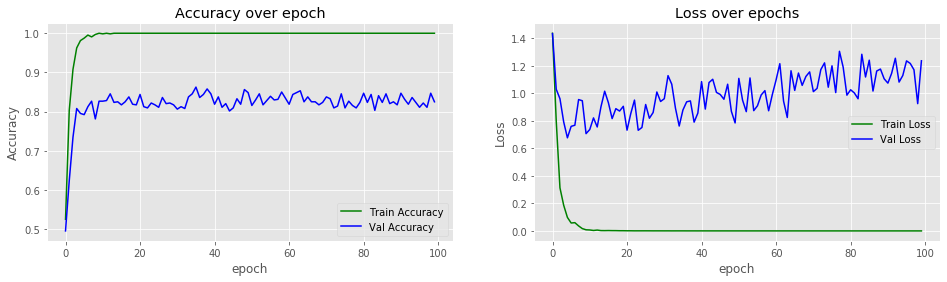

In [39]:
network2.plot_history()

#### <span style="color:red">**Question 2.8**</span> 
**Let's now compare bi-directional with one-directional RNN. In this experiment, should try at least 3 combinations of `(ebd_size, state_size)`, for example (16, 16), and for each combination, train the model with `lstm` and `gru` cells using bi-directional and one-directional architecture. Report in a table the combinations you tried along with the best validation accuracy achieved during training of each combination. Does bi-directional RNN work better than one-directional RNN when using LSTM cells? Does bi-directional RNN work better than one-directional RNN when using GRU cells? Finally, enter the combinations that achieved the best validation accuracy you cand find in the following cell and run to display the result.**

<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

<span style="color:red">**Your answer here:**</span>

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

#### Experimental Results:
For both cell types and both network types, `num_layers=2`.

***
`GRU` $\;$ `uni-directional`

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 150 | 1.0000 | 0.8625 | 0.8063 |
| 2 | 200 | 150 | 1.0000 | 0.8125 | 0.7547 |
| 3 | 100 | 150 | 1.0000 | 0.8266 | 0.7531 |
| 4 | 200 | 100 | 1.0000 | 0.8078 | 0.7297 |

***
`GRU` $\;$ `bi-directional`

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 150 | 1.0000 | 0.8234 | 0.7453 |
| 2 | 200 | 150 | 1.0000 | 0.8438 | 0.8016 |
| 3 | 100 | 150 | 1.0000 | 0.8172 | 0.7797 |
| 4 | 200 | 100 | 1.0000 | 0.8359 | 0.7484 |

***
`LSTM` $\;$ `uni-directional`

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 150 | 1.0000 | 0.8172 | 0.7375 |
| 2 | 200 | 150 | 1.0000 | 0.7969 | 0.7297 |
| 3 | 300 | 100 | 1.0000 | 0.8219 | 0.7609 |
| 4 | 200 | 100 | 1.0000 | 0.8531 | 0.7828 |

***
`LSTM` $\;$ `bi-directional`

| No. | ebd_size | state_size | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- |
| 1 | 300 | 150 | 1.0000 | 0.8125 | 0.7266 |
| 2 | 200 | 150 | 1.0000 | 0.8453 | 0.7797 |
| 3 | 300 | 100 | 1.0000 | 0.8219 | 0.7750 |
| 4 | 200 | 100 | 1.0000 | 0.8313 | 0.7750 |

#### Observation:

The experiment uses the best 3 combinations found from the previous question for each cell type and randomly selects one to observe. The number of layers used are just 2. In total, there are 4 combinations for both network types and both cell types. When using either `LSTM` or `GRU` cell, the bi-directional RNN sometimes works better than the uni-directional one and the same goes in the opposite way. This situation happens the same as what I encounter in ***Question 2.2*** (CNN). There is no significant linear relationship between validation accuracy and `net_type`. Hence, the evidence is not sufficient to say which `net_type` works better than the other in which the context of `GRU` or `LSTM` being used.

The combination selected here is obviously with the highest (best) validation accuracy and also the highest (last) validation accuracy, which is `net_type='uni-directional'`, `ebd_size=300`, `state_size=150`, `num_layers=2` and `cell_type='gru'`.

In [40]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# load data again to ensure reproducibility
train_dm, test_dm, dictionary, id2word = load_data()
network3 = RNN(vocab_size=len(dictionary),
               ebd_size=300# INSERT YOUR CODE HERE
               ,
               state_size=150# INSERT YOUR CODE HERE
               ,
               num_layers=2# INSERT YOUR CODE HERE
               ,
               cell_type='gru'# INSERT YOUR CODE HERE
               ,
               net_type='uni-directional'# INSERT YOUR CODE HERE
               ,
               batch_size=32,
               num_epochs=100,
               num_classes= train_dm.num_classes,
               random_state=6789,
               name='rnn2')
network3.fit(train_dm)

Loading data...
Finished loading data!
Epoch 001
Train loss: 1.0340   Train accuracy: 0.6594
Valid loss: 1.1206   Valid accuracy: 0.6453   Best valid accuracy: 0.6453
Epoch 002
Train loss: 0.5970   Train accuracy: 0.8250
Valid loss: 0.8546   Valid accuracy: 0.7422   Best valid accuracy: 0.7422
Epoch 003
Train loss: 0.2133   Train accuracy: 0.9484
Valid loss: 0.8744   Valid accuracy: 0.7312   Best valid accuracy: 0.7422
Epoch 004
Train loss: 0.1530   Train accuracy: 0.9578
Valid loss: 0.8479   Valid accuracy: 0.7797   Best valid accuracy: 0.7797
Epoch 005
Train loss: 0.0693   Train accuracy: 0.9859
Valid loss: 0.7375   Valid accuracy: 0.7953   Best valid accuracy: 0.7953
Epoch 006
Train loss: 0.0406   Train accuracy: 0.9938
Valid loss: 0.8481   Valid accuracy: 0.8031   Best valid accuracy: 0.8031
Epoch 007
Train loss: 0.0262   Train accuracy: 0.9953
Valid loss: 0.8215   Valid accuracy: 0.8016   Best valid accuracy: 0.8031
Epoch 008
Train loss: 0.0119   Train accuracy: 0.9984
Valid loss:

Epoch 065
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.3520   Valid accuracy: 0.8094   Best valid accuracy: 0.8625
Epoch 066
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.1942   Valid accuracy: 0.8406   Best valid accuracy: 0.8625
Epoch 067
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.4039   Valid accuracy: 0.8094   Best valid accuracy: 0.8625
Epoch 068
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.2749   Valid accuracy: 0.8266   Best valid accuracy: 0.8625
Epoch 069
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.2266   Valid accuracy: 0.8187   Best valid accuracy: 0.8625
Epoch 070
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.4600   Valid accuracy: 0.7922   Best valid accuracy: 0.8625
Epoch 071
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.2699   Valid accuracy: 0.8344   Best valid accuracy: 0.8625
Epoch 072
Train loss: 0.0001   Train accuracy: 1.0000
Valid loss: 1.1586   Valid accuracy: 0.8375   Best

<Figure size 432x288 with 0 Axes>

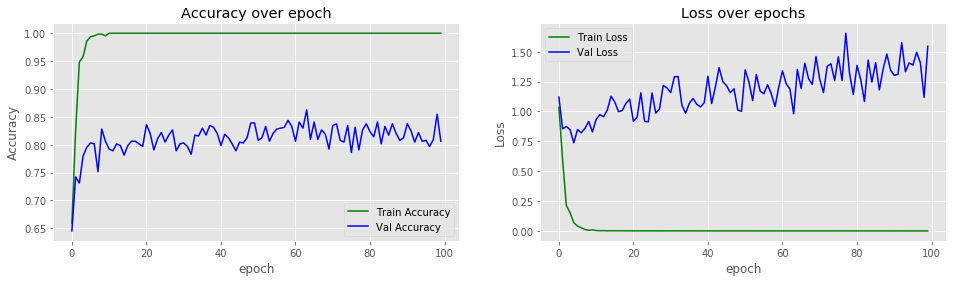

In [41]:
network3.plot_history()

#### <span style="color:red">**Question 2.9**</span> 
**You've now gained some experience and intuition about what work for RNN in this task. Please use your experience and find the best model by trying different combinations for `cell_type`, `net_type`, `ebd_size`, `state_size`, `learning_rate`, and `batch size`. You should be able to get best validation accuracy more than $80%$. Please report the experiments and share your findings and lessons learned. Finally, enter the combinations that achieved the best validation accuracy you cand find in the following cell and run to display the result.**

<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

<span style="color:red">**Your answer here:**</span>

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

#### Attempt

`GRU` $\;$ `uni-directional`

| No. | ebd_size | state_size | num_layers | batch_size | learning_rate | Train.Acc | Best Val.Acc | Last Val.Acc |
| --- | --- | --- | --- | --- |  --- | --- | --- |  --- |
| 1 | 200 | 150 | 1 | 32 | 0.0001 | 1.0000 | 0.7953 | 0.7797 |
| 2 | 300 | 150 | 2 | 32 | 0.0001 | 1.0000 | 0.7500 | 0.6969 |
| 3 | 400 | 150 | 3 | 32 | 0.001 | 1.0000 | 0.8188 | 0.7641 |
| 4 | 200 | 150 | 1 | 64 | 0.001 | 1.0000 | 0.8477 | 0.7977 |
| 5 | 200 | 150 | 1 | 16 | 0.001 | 1.0000 | 0.8875 | 0.8562 |
| 6 | 300 | 150 | 2 | 16 | 0.001 | 1.0000 | 0.8750 | 0.8469 |
| 7 | 200 | 150 | 1 | 8 | 0.001 | 1.0000 | 0.9438 | 0.8625 |
| 8 | 300 | 150 | 2 | 8 | 0.001 | 1.0000 | 0.9062 | 0.8063 |
| 9 | 200 | 150 | 1 | 1 | 0.001 | 1.0000 | 1.0000 | 0.7500 |

#### Observation
My idea for finding the best model basically starts with solving the overfitting problem. Based on my experience from the last few questions, I realised that changing `ebd_size`, `state_size` and `net_type` would not give any insight and increasing the `num_layers` would also increase the model complexity. Thus, the remaining hyperparameters that can be played with are just the `learning_rate` and the `batch_size` as the `cell_type` chosen would be `GRU` as stated in ***Question 2.7***. The combinations selected to be started with are the best ones from ***Question 2.7*** and ***Quesntion 2.8***. Since the convergence of training accuracy is way too fast, a lower learning rate is then experimented first (for the 1st and 2nd attempts). Unfortunately, it did go to the way I want. My third attempt is just a random guess on the relationship between `ebd_size` and `num_layers`. From my forth attempt onwards, my focus turned to be on the `batch_size`. As you can see from the table above, I did adjust the `batch_size` and something was emerging. When using lower `batch_size`, the best validation accuracy goes up. An extreme value of 1 for the `batch_size` gave the perfect score for the best validation accuracy. 

However, my final combination for the best one is not the last attempt one because the gap between the best and the last validation accuracy is relatively bigger than my expected range, which is showing an obvious overfitting issue here. The lesson learned from this is that we should not just look at the so-called "best" validation accuracy here (quite misleading to me in this assignment at first) and try to play with different hyperparameters for gaining more insights. Also, it is good to practice with the countermeasures for resolving the overfitting problem and lastly, `batch_size` is way more important than I thought.

The combination for the best model here is `ebd_size = 200`, `state_size = 150`, `num_layers = 1`, `batch_size = 8`, `cell_type = 'gru'`, `learning_rate = 0.001` and `net_type = 'uni-directional'`. The reason is the same as it has the highest (best) validation accuracy and also the highest (last) validation accuracy. The last one is not taken into consideration due to the reason mentioned above and it also took a lot of time. Also, The gap between the best and the last validation accuracy for the best model is acceptable for me.

(Note: The result shown below was not the one I obtained for the first time and I have confirmed by running it for few times. It would be slightly different but generally 90% or above.)

In [56]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# load data again to ensure reproducibility
train_dm, test_dm, dictionary, id2word = load_data()
network4 = RNN(vocab_size=len(dictionary),
               ebd_size=200# INSERT YOUR CODE HERE
               ,
               state_size=150# INSERT YOUR CODE HERE
               ,
               num_layers=1# INSERT YOUR CODE HERE
               ,
               cell_type='gru'# INSERT YOUR CODE HERE
               ,
               net_type='uni-directional'# INSERT YOUR CODE HERE
               ,
               batch_size=8# INSERT YOUR CODE HERE
               ,
               learning_rate=0.001# INSERT YOUR CODE HERE
               ,
               num_epochs=100# INSERT YOUR CODE HERE
               ,
               num_classes= train_dm.num_classes,
               random_state=6789,
               name='rnn3')
network4.fit(train_dm)

Loading data...
Finished loading data!
Epoch 001
Train loss: 0.8160   Train accuracy: 0.7750
Valid loss: 0.9950   Valid accuracy: 0.6562   Best valid accuracy: 0.6562
Epoch 002
Train loss: 0.3441   Train accuracy: 0.8750
Valid loss: 0.7602   Valid accuracy: 0.7937   Best valid accuracy: 0.7937
Epoch 003
Train loss: 0.2717   Train accuracy: 0.9375
Valid loss: 0.5106   Valid accuracy: 0.8250   Best valid accuracy: 0.8250
Epoch 004
Train loss: 0.0965   Train accuracy: 0.9688
Valid loss: 0.9731   Valid accuracy: 0.7187   Best valid accuracy: 0.8250
Epoch 005
Train loss: 0.0328   Train accuracy: 0.9938
Valid loss: 0.7387   Valid accuracy: 0.8000   Best valid accuracy: 0.8250
Epoch 006
Train loss: 0.0388   Train accuracy: 0.9875
Valid loss: 0.6167   Valid accuracy: 0.8187   Best valid accuracy: 0.8250
Epoch 007
Train loss: 0.0288   Train accuracy: 0.9875
Valid loss: 1.1033   Valid accuracy: 0.7812   Best valid accuracy: 0.8250
Epoch 008
Train loss: 0.0101   Train accuracy: 0.9938
Valid loss:

Epoch 065
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.4754   Valid accuracy: 0.8375   Best valid accuracy: 0.8875
Epoch 066
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 0.6044   Valid accuracy: 0.9313   Best valid accuracy: 0.9313
Epoch 067
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.5772   Valid accuracy: 0.8062   Best valid accuracy: 0.9313
Epoch 068
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.2424   Valid accuracy: 0.8750   Best valid accuracy: 0.9313
Epoch 069
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.0301   Valid accuracy: 0.8563   Best valid accuracy: 0.9313
Epoch 070
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.1648   Valid accuracy: 0.8875   Best valid accuracy: 0.9313
Epoch 071
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.3805   Valid accuracy: 0.8312   Best valid accuracy: 0.9313
Epoch 072
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.3400   Valid accuracy: 0.8250   Best

<Figure size 432x288 with 0 Axes>

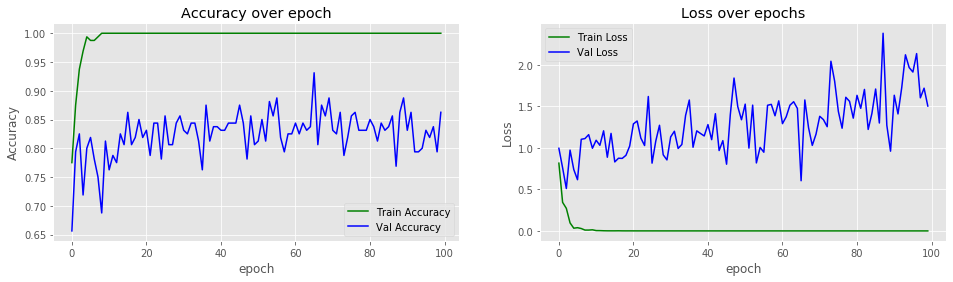

In [57]:
network4.plot_history()

#### <span style="color:red">**Question 2.10**</span> 
**Let's examine more closely how the CNN and RNN models classify a random question. You'll write a function `classify_question` in the following cell. The arguments to the function include:**
- `model`: the model that you've just trained.
- `question`: an array of word id for the question, which will be fed to the input placeholder.
- `qlen`: length of the question before being padded.
- `id2word`: the dictionary that maps word id back to word
- `id2class`: the dictionary that maps label ids back to labels in words.

**The function should print two lines. The first line is the `question` in words. The second line is the category of the question predicted by the model.**
    
<div style="text-align: right"> <span style="color:red">[2 points]</span> </div>

In [59]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
def classify_question(model, question, qlen, id2word, id2class):
    # INSERT YOUR CODE HERE
    print("Question: " + " ".join(list(map(id2word.get, question))[:qlen]))
    y_pred = model.predict(X=[question], qlen=[qlen])
    print("Category: " + id2class[int(y_pred)])

#### <span style="color:red">**Question 2.11**</span> 
**In the cell below, enter your student id and run the cells to compare prediction of the two models on different test questions. How good are the predictions?**
    
<div style="text-align: right"> <span style="color:red">[2 points]</span> </div>

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

Their predictions are excellent and they are more or less the same. However, by counting of the accuracy from these 10 questions, RNN performs slightly better than CNN just because it got 9/10 and CNN got 8/10. Both of them got wrong for the question "what french province is cognac produced in ?", which is asking for a location (`LOC`). 

In [60]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

your_id = 28279174# enter your student id here

print('---------Examples of  CNN model prediction---------')
for k in range(10):
    id = (your_id * (k + 1)) % test_dm.numeral_data.shape[0]
    classify_question(network1, test_dm.numeral_data[id], test_dm.qlen[id], id2word, test_dm.str_classes)
    
print('---------Examples of  RNN model prediction---------')
for k in range(10):
    # ENTER YOUR CODE HERE
    id = (your_id * (k + 1)) % test_dm.numeral_data.shape[0]
    classify_question(network4, test_dm.numeral_data[id], test_dm.qlen[id], id2word, test_dm.str_classes)

---------Examples of  CNN model prediction---------
Question: where is the shawnee national forest ?
Category: LOC
Question: what year did the andy griffith show begin ?
Category: NUM
Question: what river in the us is known as the big muddy ?
Category: LOC
Question: what currency is used in algeria ?
Category: ENTY
Question: what is the atomic weight of silver ?
Category: ENTY
Question: what is the proper name for a female walrus ?
Category: ENTY
Question: how many pounds in a ton ?
Category: NUM
Question: what is a baby lion called ?
Category: DESC
Question: what do you call a newborn kangaroo ?
Category: ENTY
Question: what french province is cognac produced in ?
Category: ENTY
---------Examples of  RNN model prediction---------
Question: where is the shawnee national forest ?
Category: LOC
Question: what year did the andy griffith show begin ?
Category: NUM
Question: what river in the us is known as the big muddy ?
Category: LOC
Question: what currency is used in algeria ?
Category:

#### <span style="color:red">**Question 2.12**</span> 
**Let\'s now test the two models by running the following cell to see which one performs better. Did you expect the result? Which model do you prefer for this task? Also, find some test questions where one model is correct but the other model is wrong. Can you see any difference in the way the two models make predictions?**
    
<div style="text-align: right"> <span style="color:red">[2 points]</span> </div>

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

The result here is unexpected and since CNN's testing accuracy is higher in this case, it is more convincing to choose CNN as my preferable model for this task. 

There are two questions with different answers provided by each model and CNN got them correct:

***

***Question 1***

CNN

Question: how tall is the sears building ?

Category: NUM

RNN

Question: how tall is the sears building ?

Category: DESC

*** 

***Question 2***

CNN

Question: george bush purchased a small interest in which baseball team ?

Category: HUM

RNN

Question: george bush purchased a small interest in which baseball team ?

Category: LOC

***

The differences I can observe from both questions here are that RNN is not as capable as CNN when encountering "how" type of questions and it will recognise the hint "in" before a question word "which" as a location type of answer. It might be because RNN is trying to do hard memorization on train data, which could be a cause of overfitting. 

In [61]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

cnn_pred, cnn_acc = network1.predict(test_dm.numeral_data, test_dm.numeral_labels, test_dm.qlen)# INSERT YOUR CODE HERE
print("CNN Testing accuracy: {:.4f}".format(cnn_acc))

rnn_pred, rnn_acc = network4.predict(test_dm.numeral_data, test_dm.numeral_labels, test_dm.qlen)# INSERT YOUR CODE HERE
print("RNN Testing accuracy: {:.4f}".format(rnn_acc))

ids = [i for i in range(10)]# INSERT YOUR CODE HERE

for id in ids:
    print('-----')
    print('CNN')
    classify_question(network1, test_dm.numeral_data[id], test_dm.qlen[id], id2word, test_dm.str_classes)
    print('RNN')
    classify_question(network4, test_dm.numeral_data[id], test_dm.qlen[id], id2word, test_dm.str_classes)

CNN Testing accuracy: 0.8400
RNN Testing accuracy: 0.8020
-----
CNN
Question: how far is it from denver to aspen ?
Category: NUM
RNN
Question: how far is it from denver to aspen ?
Category: NUM
-----
CNN
Question: what county is modesto , california in ?
Category: LOC
RNN
Question: what county is modesto , california in ?
Category: LOC
-----
CNN
Question: who was galileo ?
Category: HUM
RNN
Question: who was galileo ?
Category: HUM
-----
CNN
Question: what is an atom ?
Category: DESC
RNN
Question: what is an atom ?
Category: DESC
-----
CNN
Question: when did hawaii become a state ?
Category: NUM
RNN
Question: when did hawaii become a state ?
Category: NUM
-----
CNN
Question: how tall is the sears building ?
Category: NUM
RNN
Question: how tall is the sears building ?
Category: DESC
-----
CNN
Question: george bush purchased a small interest in which baseball team ?
Category: HUM
RNN
Question: george bush purchased a small interest in which baseball team ?
Category: LOC
-----
CNN
Questio

#### <span style="color:red">**Question 2.13**</span>
**You now have trained the two models. Let's examine the quality of the learned embeddings in representing semantic meaning of the words. Good embeddings should have words close in meaning near each other by some similarity metrics. The similarity metric we'll use is the `consine` distance, which is defined for two vector $\mathbf{u}$ and $\mathbf{v}$ as $\cos(\mathbf{u}, \mathbf{v})=\frac{\mathbf{u} \cdot \mathbf{v}}{\left\Vert{\mathbf{u}}\right\Vert\left\Vert{\mathbf{v}}\right\Vert}$ where $\cdot$ means dot product and $\left\Vert\cdot\right\Vert$ means the $\mathcal{L}_2$ norm.**

**In the following cell, write the function `cosine_similarity` that computes the cosine similarity and the function `nearest` that return top $k$ nearest words based on the `cosine` similarity. The specifications for each function are as following:**
- `cosine_similarity`: Input is a matrix `ebd` where each row represent a vector. This function will return a matrix $\mathbf{S}$ of which $\mathbf{S}_{i, j} = \cos(\mathbf{ebd}_{i, :}, \mathbf{ebd}_{j, :})$
- `nearest`: Inputs include a string `word`, a positive integer `k`, a similarity matrix `sim`, a `dict` object `dictionary` that maps `word` to its word id, and another `dict` object `id2word` that maps word ids back to words. This function return a list of top k nearest words to `word` according to `sim`. The returned list should not include `word` itself.
    
<div style="text-align: right"> <span style="color:red">[2 points]</span> </div>. 

In [62]:
def cosine_similarity(ebd):
    norm = np.sqrt(np.sum(np.square(ebd), axis=1, keepdims=True))
    normalized_ebd = ebd / norm
    similarity = np.matmul(normalized_ebd, normalized_ebd.T)
    return similarity

def nearest(word, k, sim, dictionary, id2word):
    i = dictionary[word]
    ids = sim[i].argsort()[-(k + 1): -1][::-1]
    return [id2word[id] for id in ids]

In [63]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
def cosine_similarity(ebd):
    norm = np.sqrt(np.sum(np.square(ebd), axis=1, keepdims=True))# INSERT YOUR CODE HERE
    normalized_ebd = ebd / norm
    similarity = np.matmul(normalized_ebd, normalized_ebd.T)
    return similarity
    
def nearest(word, k, sim, dictionary, id2word):
    i = dictionary[word]
    ids = sim[i].argsort()[-(k + 1): -1][::-1]# INSERT YOUR CODE HERE
    return [id2word[id] for id in ids]

#### <span style="color:red">**Question 2.14**</span> 
**Finally, you'll need to get the embeddings learned by the best CNN model (`network1`) and the best RNN model (`network4`), compute the `cosine` similarity matrix for each embedding, choose 10 random words that appear `dictionary`, and find the top 5 nearest words for each of them using each of the two similarity matrices. How do the top 5 nearest words relate to each of the enquired word? Can you explain why those words are close to each other as a result of the model training? Lastly, which model learns better embeddings?**
    
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

The examples in my case are very ambiguous and unclear. However, I would say the nearest words in the case of CNN are just words that are semantically similar to the enquired word but for RNN, it looks like its embedding is showing the words around the enquired word (because they might be those words co-exist in the same training datapoints). This happens probably because of the way their networks did the backpropagation and the network structure. CNN does dimensionality reduction (make large data smaller while preserving information) via convolution layers while RNN is the network that its next state depends on its past state(s). In other words, the next word depends on words came before. This could be one of the reasons why the result became. According to my observation, the better embeddings learned here would be CNN as its correctness is relatively higher compared to RNN.


In [64]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
ebd1 = network1.session.run(network1.embeddings)# INSERT YOUR CODE HERE
sim1 = cosine_similarity(ebd1)# INSERT YOUR CODE HERE

ebd4 = network4.session.run(network4.embeddings)# INSERT YOUR CODE HERE
sim4 = cosine_similarity(ebd4)# INSERT YOUR CODE HERE

import random
random.seed(28279174)
# code below would get 10 random words out of the dictionary ("_PAD" is not considered)
# Note: the arguments are inclusive
# Reference: https://docs.python.org/2/library/random.html
enquired_words = [id2word[random.randint(1, len(dictionary) - 1)] for i in range(10)]# INSERT YOUR CODE HERE

for word in enquired_words:
    print('-----Nearest words to {}-----'.format(word))
    print('CNN model: ', nearest(word, 5, sim1, dictionary, id2word))
    print('RNN model: ', nearest(word, 5, sim4, dictionary, id2word))
    print()


-----Nearest words to valley-----
CNN model:  ['city', 'countries', 'area', 'where', 'ocean']
RNN model:  ['reims', 'yellow', 'tourist', 'city', 'highest']

-----Nearest words to leno-----
CNN model:  ['writer', 'received', 'said', 'billy', 'inhabit']
RNN model:  ['founding', 'pirate', 'lead', 'blue', 'coined']

-----Nearest words to lagoon-----
CNN model:  ['picked', 'writer', 'mandy', 'founded', 'nicholas']
RNN model:  ['judge', 'organization', '1983', 'council', 'pirate']

-----Nearest words to nonaggression-----
CNN model:  ['current', 'winter', 'beaver', 'elect', 'convicted']
RNN model:  ['einstein', 'population', 'air', 'boxing', 'average']

-----Nearest words to portly-----
CNN model:  ['youngest', 'character', 'photographer', 'electricity', 'bastille']
RNN model:  ['her', 'michelangelo', 'occupation', 'profession', 'painted']

-----Nearest words to quarters-----
CNN model:  ['river', 'pairs', 'longitude', 'equivalent', 'fast']
RNN model:  ['light', 'wingspan', 'ohio', 'acreage'

#### <span style="color:red">**Question 2.15**</span> 
**Through the modeling and coding journey thus far, you would have now reproduced the work of Roth and Xin 2002, via a modern tool of deep learning. Instead of manually constructing hundreds of thousands of features, CNNs/RNNS have allowed us to extract features completely automatically.**

a) Report the best performance you've achieved and compared this the result reported in Roth and Xin 2002's paper (Hint: you have to make comparison sensibly, ie.., we've also used 1000 training sentences so far).

b) So far we've also used 1000 training sencences. Use the best configuration of your model, but now train on 5500 training sentences, report the result? Does it improve compared with using 1000 training sentences? and how does it compared with the result report in Roth and Xin 2002's paper?
    
<div style="text-align: right"> <span style="color:red">[8 points]</span> </div>

<font size=2><span style="color:blue;font-weight:bold;">Answer</span></font>

#### Model Selection

Since `CNN` performs better than `RNN` (the best model chosen in ***Question 2.9***) in this case (comparison using 500 test datapoints in ***Question 2.12***), I choose the result of `CNN` to compare with the result reported in Roth and Xin 2002's paper. 

#### Note
The model performance measured in Roth and Xin 2002's paper is based on 500 test datapoints. The one we did here is basically splitting training and validation data into 90% and 10% according to `model.py` provided. Therefore, when doing ***Question 2.12***, the validation accuracy in RNN did not reflect the ability of model as there are only 100 unseen datapoints and it is also overfitted.

#### (a)

`CNN` $\;\;\;$ `Train Set = 1000`

| Model | Test.Acc/$P_1$ |
|---|---|
| Ours | 0.8400 |
| Roth and Xin | 0.8380 |

(Result stated is based on the test set - 500 datapoints)

We have also used 1000 training sentences so far and our result obtained is slighty better than the one in Roth and Xin 2002's paper. However, the keypoint here is that the existence of automated feature extraction merchanism allows us to easily achieve such nice performance compared to the one that researchers had put so much effort into the handcrafted feature construction approach.

#### (b)

`CNN` $\;\;\;$ `Train Set = 5500`

| Model | Test.Acc/$P_1$ |
|---|---|
| Ours |  |
| Roth and Xin | 0.9100 |

(Result stated is based on the test set - 500 datapoints)



The code below is how I load the training dataset for 5500 datapoints and the general process for training and testing a model

In [65]:
def my_load_data(verbose=False):
    print('Loading data...')
    # download data if needed
    # train 5500
    train_dm = DataManager(random_state=6789, verbose=verbose)
    train_dm.maybe_download("Data", "train_5500.label", "http://cogcomp.org/Data/QA/QC/")
    # test 500 (re-initialize)
    test_dm = DataManager(random_state=6789, verbose=verbose)
    test_dm.maybe_download("Data", "TREC_10.label", "http://cogcomp.org/Data/QA/QC/")

    # read data
    train_dm.read_data("Data/", "train_5500.label")
    test_dm.read_data("Data/", "TREC_10.label")

    # pad question so that questions are of the same length
    pad_len = max(train_dm.max_sentence_len, test_dm.max_sentence_len)
    train_dm.padding(pad_len)
    test_dm.padding(pad_len)

    # get the list of questions
    all_questions= list(train_dm.questions) 
    all_questions.extend(test_dm.questions)

    # tockenize questions and create a dictionary to map words to numbers
    dictionary, id2word, _= DataManager.build_dictionary_count(all_questions)

    # map questions to sequence of word ids in the dictionary created
    train_dm.build_numeral_data(dictionary)
    test_dm.build_numeral_data(dictionary)
    train_dm.train_valid_split()
    data_batch, label_batch, qlen = train_dm.next_batch(batch_size=5)
    if verbose:
        print("Sample data batch- label batch \n")
        print("Question sequences: ", data_batch)
        print("Question labels: ", label_batch)
        print("Quenstion length: ", qlen)    
    print('Finished loading data!')
    return train_dm, test_dm, dictionary, id2word

In [66]:
# Check if my_load_data function is working successfully
train_dm, test_dm, dictionary, id2word = my_load_data(verbose=True)

Loading data...
Downloaded successfully train_5500.label
Downloaded successfully TREC_10.label
Sample questions 

[['how', 'did', 'serfdom', 'develop', 'in', 'and', 'then', 'leave', 'russia', '?'], ['what', 'films', 'featured', 'the', 'character', 'popeye', 'doyle', '?'], ['how', 'can', 'i', 'find', 'a', 'list', 'of', 'celebrities', "'", 'real', 'names', '?'], ['what', 'fowl', 'grabs', 'the', 'spotlight', 'after', 'the', 'chinese', 'year', 'of', 'the', 'monkey', '?'], ['what', 'is', 'the', 'full', 'form', 'of', '.com', '?']]
Labels ['ABBR' 'DESC' 'ENTY' 'HUM' 'LOC' 'NUM']


Sample questions 

[['how', 'far', 'is', 'it', 'from', 'denver', 'to', 'aspen', '?'], ['what', 'county', 'is', 'modesto', ',', 'california', 'in', '?'], ['who', 'was', 'galileo', '?'], ['what', 'is', 'an', 'atom', '?'], ['when', 'did', 'hawaii', 'become', 'a', 'state', '?']]
Labels ['ABBR' 'DESC' 'ENTY' 'HUM' 'LOC' 'NUM']


Sample numeral data 

[[   8   17 3603 2249    6   16  477  821  997    1    0    0    0    0

In [67]:
# Print the shape of loaded train (and test)
train_dm.numeral_data.shape, test_dm.numeral_data.shape

((5452, 37), (500, 37))

In [68]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# load data again to ensure reproducibility
train_dm, test_dm, dictionary, id2word = my_load_data()
network5 = CNN(vocab_size=len(dictionary),
               ebd_size= 300# INSERT YOUR CODE HERE
               ,
               state_size= 150# INSERT YOUR CODE HERE
               ,
               batch_size=32,
               num_epochs=100,
               num_classes= train_dm.num_classes,
               random_state=6789,
               name='CNN2')
network5.fit(train_dm)

Loading data...
Finished loading data!
Epoch 001
Train loss: 0.3561   Train accuracy: 0.8938
Valid loss: 0.5434   Valid accuracy: 0.7812   Best valid accuracy: 0.7812
Epoch 002
Train loss: 0.0701   Train accuracy: 0.9875
Valid loss: 0.5776   Valid accuracy: 0.8438   Best valid accuracy: 0.8438
Epoch 003
Train loss: 0.1374   Train accuracy: 0.9500
Valid loss: 0.7376   Valid accuracy: 0.7750   Best valid accuracy: 0.8438
Epoch 004
Train loss: 0.0184   Train accuracy: 1.0000
Valid loss: 0.3660   Valid accuracy: 0.8937   Best valid accuracy: 0.8937
Epoch 005
Train loss: 0.0019   Train accuracy: 1.0000
Valid loss: 0.7749   Valid accuracy: 0.8375   Best valid accuracy: 0.8937
Epoch 006
Train loss: 0.0023   Train accuracy: 1.0000
Valid loss: 0.6960   Valid accuracy: 0.8125   Best valid accuracy: 0.8937
Epoch 007
Train loss: 0.0026   Train accuracy: 1.0000
Valid loss: 0.7848   Valid accuracy: 0.8312   Best valid accuracy: 0.8937
Epoch 008
Train loss: 0.0157   Train accuracy: 0.9938
Valid loss:

Epoch 065
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 2.1855   Valid accuracy: 0.8250   Best valid accuracy: 0.9063
Epoch 066
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.7415   Valid accuracy: 0.8375   Best valid accuracy: 0.9063
Epoch 067
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.8324   Valid accuracy: 0.8500   Best valid accuracy: 0.9063
Epoch 068
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.1395   Valid accuracy: 0.8750   Best valid accuracy: 0.9063
Epoch 069
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 2.4070   Valid accuracy: 0.8438   Best valid accuracy: 0.9063
Epoch 070
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.7133   Valid accuracy: 0.8250   Best valid accuracy: 0.9063
Epoch 071
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 2.3083   Valid accuracy: 0.8312   Best valid accuracy: 0.9063
Epoch 072
Train loss: 0.0000   Train accuracy: 1.0000
Valid loss: 1.7106   Valid accuracy: 0.8438   Best

<Figure size 432x288 with 0 Axes>

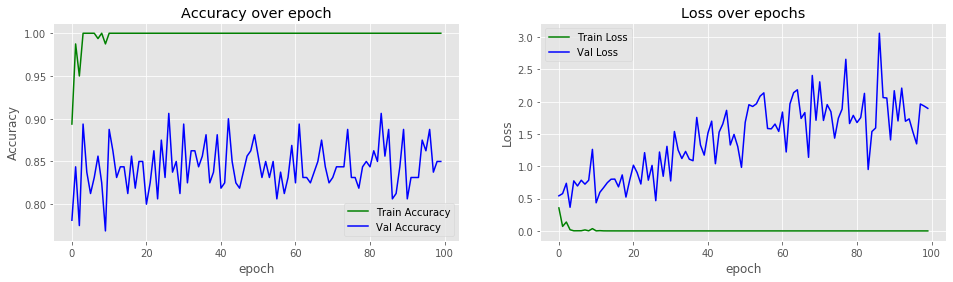

In [69]:
network5.plot_history()

In [ ]:
cnn2_pred, cnn2_acc = network5.predict(test_dm.numeral_data, test_dm.numeral_labels, test_dm.qlen)
print("CNN2 Testing accuracy: {:.4f}".format(cnn2_acc))

--- 
<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>